# Caspar's notebook

Scrape some images?

In [1]:
# ! pip install beautifulsoup4 requests pandas


In [2]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # URL to scrape
# url = 'https://pokemondb.net/evolution'

# # Send a GET request to the URL
# response = requests.get(url)

# if response.status_code == 200:
#     soup = BeautifulSoup(response.content, 'html.parser')
#     infocard_lists = soup.find_all(class_='infocard-list-evo')

#     # Prepare a list to hold the scraped data
#     data = []

#     # Iterate over each infocard-list-evo
#     for infocard_list in infocard_lists:
#         # Iterate over each infocard within the list
#         for pokemon in infocard_list.find_all(class_='infocard'):
#             source_tag = pokemon.find('source')
#             if source_tag and 'srcset' in source_tag.attrs:
#                 # Get the first URL from srcset
#                 image_url = source_tag['srcset'].split()[0]
#             else:
#                 image_url = None  # or some default value

#             name_tag = pokemon.find('a', class_='ent-name')
#             if name_tag:
#                 name = name_tag.text
#             else:
#                 name = "Unknown"  # or some default value

#             type_tags = pokemon.find_all(class_='itype')
#             types = [type_.text for type_ in type_tags] if type_tags else []

#             data.append({
#                 'name': name,
#                 'image': image_url,
#                 'types': ', '.join(types)
#             })

#     # Convert the list to a DataFrame
#     pokemon_df = pd.DataFrame(data)

#     # Save the DataFrame to a CSV file
#     pokemon_df.to_csv('pokemon_data.csv', index=False)

#     # Display the first few rows of the DataFrame
#     print(pokemon_df.head())
# else:
#     print("Failed to scrape the page")


In [3]:
# pd.set_option('display.max_colwidth', None)  # or use a specific large number instead of None

# pokemon_df.head(20)


In [4]:
# # Print the first few image URLs to check their full length
# for url in pokemon_df['image'].head(10):
#     print(url)


In [5]:
# https://img.pokemondb.net/artwork/ivysaur.jpg


Clean the scraped data

1 - duplicates

In [6]:
# # To view the duplicate rows
# duplicate_rows = pokemon_df[pokemon_df.duplicated()]

# print(duplicate_rows)


In [7]:
# # Filter out rows where name is 'Unknown'
# filtered_df = pokemon_df[pokemon_df['name'] != 'Unknown']

# # Find duplicates in the filtered DataFrame
# duplicate_rows_filtered = filtered_df[filtered_df.duplicated()]

# # Display the duplicate rows
# print(duplicate_rows_filtered)


In [8]:
# # Filter out rows where the 'image' column is 'no_image_available.jpg' or None
# filtered_df = pokemon_df[pokemon_df['image'] != 'no_image_available.jpg']
# filtered_df = filtered_df[pokemon_df['name'] != 'Unknown']

# filtered_df = filtered_df[filtered_df['image'].notna()]

# print(filtered_df.head())


In [9]:
# # pokemon_df = pokemon_df.drop_duplicates()
# filtered_df.head()


check missing values

standardize data formats

In [10]:
# # Ensure names are capitalized
# pokemon_df['name'] = pokemon_df['name'].str.capitalize()


remove unnecessary columns

In [11]:
# Example: Drop a column if needed
# pokemon_df = pokemon_df.drop(columns=['unnecessary_column'])


split columns if needed

In [12]:
# Example: If you have a column that needs to be split
# pokemon_df[['part1', 'part2']] = pokemon_df['combined_column'].str.split(' ', expand=True)


Save to csv

In [13]:
# filtered_df.to_csv('pokemon_data_from_pokemondb_net_evolution_page.csv', index=False)


If I scrape other pages maybe there are other images too

In [14]:
# import requests
# from bs4 import BeautifulSoup
# import pandas as pd

# # Function to scrape individual Pokemon sprite page
# def scrape_pokemon_page(url):
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
#     pokemon_name = soup.find('h1').text.replace(' sprites', '')

#     sprites_data = []
#     # Iterate over each table row and extract sprite info
#     for row in soup.find_all('tr')[1:]:  # Skipping the header row
#         cells = row.find_all('td')
#         if len(cells) > 1:
#             # Assuming first cell is the generation info
#             generation = cells[0].text.strip()
#             for cell in cells[1:]:
#                 img_tag = cell.find('img')
#                 if img_tag and 'src' in img_tag.attrs:
#                     img_url = img_tag['src']
#                     sprites_data.append({'name': pokemon_name, 'generation': generation, 'image_url': img_url})
#     return sprites_data

# # Main URL
# base_url = 'https://pokemondb.net'
# sprites_url = base_url + '/sprites'

# # Get the main sprite page
# response = requests.get(sprites_url)
# soup = BeautifulSoup(response.content, 'html.parser')

# # Find all links to individual Pokemon sprite pages
# pokemon_links = [base_url + tag['href'] for tag in soup.select('a.infocard[href]')]

# # DataFrame to store all sprites
# all_sprites_df = pd.DataFrame()

# # Scrape each Pokemon's sprite page
# for link in pokemon_links:
#     pokemon_sprites = scrape_pokemon_page(link)
#     all_sprites_df = all_sprites_df.append(pokemon_sprites, ignore_index=True)

# # Display the DataFrame
# print(all_sprites_df.head())


In [15]:
# all_sprites_df
# all_sprites_df.to_csv('All sprites dataframe with image urls')


# THIS TAKES AN HOUR TO RUN
# BE CAREFUL IF UNCOMMENTING AND PLEASE RE COMMENT ONCE YOUVE DOWNLOADED THE IMAGES

In [16]:
# import requests
# import os
# import zipfile

# # Function to download an image and save it to a specified folder
# def download_image(url, folder_path, file_name):
#     response = requests.get(url)
#     if response.status_code == 200:
#         with open(os.path.join(folder_path, file_name), 'wb') as file:
#             file.write(response.content)
#     else:
#         print(f"Failed to download {url}")

# # Create a directory for the downloaded images
# images_folder = 'pokemon_sprites'
# os.makedirs(images_folder, exist_ok=True)

# # Assuming 'all_sprites_df' is your DataFrame and it has 'name' and 'image_url' columns
# for index, row in all_sprites_df.iterrows():
#     # Construct a file name for the image
#     file_name = f"{row['name']}_{index}.png"
#     # Download the image
#     download_image(row['image_url'], images_folder, file_name)

# # Create a ZIP file containing all the images
# zip_file_name = 'pokemon_sprites.zip'
# with zipfile.ZipFile(zip_file_name, 'w') as zipf:
#     for root, dirs, files in os.walk(images_folder):
#         for file in files:
#             zipf.write(os.path.join(root, file), file)

# # Delete the original images folder
# import shutil
# shutil.rmtree(images_folder)

# print("Images downloaded and zipped successfully.")


# Data preprocessing

## Load data into pandas df


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [18]:
type_csv = "/Users/lapiscine/code/CasparRitchie/casparcatchemall/pokemon.csv"
pokemon_data = pd.read_csv(type_csv)
pokemon_data


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
796,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
797,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
798,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [19]:
pokemon_data.shape


(800, 41)

## 1. Data Preparation

### (1) Check for Duplicates

In [20]:
# Check for duplicate rows
print(f"Number of duplicate rows: {pokemon_data.duplicated().sum()}")

# If duplicates are found, you can remove them using
# pokemon_data = pokemon_data.drop_duplicates()


Number of duplicate rows: 0


In [21]:
pokemon_data.shape


(800, 41)

### (2) Handle Missing Data

In [22]:
# Check for missing values in each column
missing_values = pokemon_data.isna().sum()
print("Missing values per column:\n", missing_values)
# Depending on the context, you can handle missing data by dropping or imputing
# For example, to drop columns with more than 30% missing values
# threshold = 0.3 * len(pokemon_data)
# pokemon_data = pokemon_data.dropna(thresh=threshold, axis=1)

# Or to fill missing values with the mean (for numerical columns)
# pokemon_data.fillna(pokemon_data.mean(), inplace=True)


Missing values per column:
 abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       97
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             

In [23]:
pokemon_data.shape


(800, 41)

# DECISION - comment traiter les manquants height and weight

In [24]:
# # Option 1: Fill missing values with mean
pokemon_data['height_m'].fillna(pokemon_data['height_m'].median(), inplace=True)
pokemon_data['weight_kg'].fillna(pokemon_data['weight_kg'].median(), inplace=True)

# Option 2: Drop rows with missing values
# pokemon_data.dropna(subset=['height_m', 'weight_kg'], inplace=True)


In [25]:
pokemon_data.shape


(800, 41)

How to manage percentage male - can we drop this column? Does it influence the capture rate?

In [26]:
# Option 1: Fill missing values with median or a placeholder value
# pokemon_data['percentage_male'].fillna(pokemon_data['percentage_male'].median(), inplace=True)
# or
# pokemon_data['percentage_male'].fillna(-1, inplace=True)  # Placeholder for unknown

# Option 2: Drop the column
pokemon_data.drop(columns=['percentage_male'], inplace=True)


### We need to create a column called catchability which uses /2.55 to work out the % score for catchability (we might adjust this formula later)

In [27]:

# Convert capture_rate to numeric, coercing errors
pokemon_data['capture_rate'] = pd.to_numeric(pokemon_data['capture_rate'], errors='coerce')


In [28]:
pokemon_data.shape


(800, 40)

In [29]:
# find out if any have capture rate NaN etc
missing_capture_rate = pokemon_data[pokemon_data['capture_rate'].isnull()]
missing_capture_rate


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary


Found the catch rate on this website
https://bulbapedia.bulbagarden.net/wiki/Minior_(Pok%C3%A9mon)

In [30]:
# minior_row = pokemon_data[pokemon_data['name'] == 'Minior'].index
# pokemon_data.loc[minior_row, 'capture_rate'] = 30


In [31]:
# # updated row check
# updated_row = pokemon_data[pokemon_data['name'] == 'Minior']
# updated_row


In [32]:
# Replace 'name' with the actual column name for Pokémon names if it's different


In [33]:
# Create the new column 'catchability'
pokemon_data['catchability'] = pokemon_data['capture_rate'] / 2.55
# Check for missing values in catchability
missing_catchability = pokemon_data['catchability'].isnull().sum()
print(f"Missing values in catchability: {missing_catchability}")

# Remove rows where catchability is NaN
pokemon_data = pokemon_data.dropna(subset=['catchability'])

# Check again for missing values
missing_catchability = pokemon_data['catchability'].isnull().sum()
print(f"Missing values in catchability after removal: {missing_catchability}")


pokemon_data = pokemon_data.drop(columns=['capture_rate'])

# Check the first few rows to confirm the new column is added correctly
print(pokemon_data[['catchability']].head(50))


Missing values in catchability: 0
Missing values in catchability after removal: 0
    catchability
0      17.647059
1      17.647059
2      17.647059
3      17.647059
4      17.647059
5      17.647059
6      17.647059
7      17.647059
8      17.647059
9     100.000000
10     47.058824
11     17.647059
12    100.000000
13     47.058824
14     17.647059
15    100.000000
16     47.058824
17     17.647059
18    100.000000
19     49.803922
20    100.000000
21     35.294118
22    100.000000
23     35.294118
24     74.509804
25     29.411765
26    100.000000
27     35.294118
28     92.156863
29     47.058824
30     17.647059
31     92.156863
32     47.058824
33     17.647059
34     58.823529
35      9.803922
36     74.509804
37     29.411765
38     66.666667
39     19.607843
40    100.000000
41     35.294118
42    100.000000
43     47.058824
44     17.647059
45     74.509804
46     29.411765
47     74.509804
48     29.411765
49    100.000000


In [34]:
pokemon_data.shape


(800, 40)

# How to treat types. Different approach - concatenate then encode to ensure all combinations are covered

First fillna with None to ensure no missing values, then combine to a combined_type column

In [35]:
pokemon_data['type2'].fillna('None', inplace=True)
pokemon_data['combined_type'] = pokemon_data['type1'] + "_" + pokemon_data['type2']


In [36]:
pokemon_data.shape


(800, 41)

In [37]:
# Check for NaN values in 'combined_type' column
print(f"Number of NaN values in combined_type: {pokemon_data['combined_type'].isnull().sum()}")

# Check for any empty strings or unusual values in 'combined_type'
print(f"Unique values in combined_type: {pokemon_data['combined_type'].unique()}")


Number of NaN values in combined_type: 0
Unique values in combined_type: ['grass_poison' 'fire_None' 'fire_flying' 'water_None' 'bug_None'
 'bug_flying' 'bug_poison' 'normal_flying' 'normal_dark' 'poison_None'
 'electric_None' 'electric_electric' 'ground_ice' 'poison_ground'
 'fairy_None' 'fire_ice' 'normal_fairy' 'poison_flying' 'bug_grass'
 'ground_ground' 'fighting_None' 'water_fighting' 'psychic_None'
 'water_poison' 'rock_ground' 'water_psychic' 'electric_steel' 'water_ice'
 'poison_poison' 'ghost_poison' 'grass_psychic' 'ground_None'
 'ground_fire' 'normal_None' 'ground_rock' 'grass_None' 'psychic_fairy'
 'ice_psychic' 'water_flying' 'rock_water' 'rock_flying' 'ice_flying'
 'electric_flying' 'dragon_None' 'dragon_flying' 'water_electric'
 'fairy_flying' 'psychic_flying' 'water_fairy' 'rock_None' 'grass_flying'
 'water_ground' 'dark_None' 'dark_flying' 'ghost_None' 'normal_psychic'
 'bug_steel' 'ground_flying' 'steel_ground' 'bug_rock' 'bug_fighting'
 'dark_ice' 'fire_rock' 'ice_g

In [38]:
missing_values_after = pokemon_data.isnull().sum()
print(missing_values_after)


abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
catchability         0
combined_type        0
dtype: int64


then encode the new column and drop previous columns

In [39]:
pokemon_data


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,catchability,combined_type
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,65,65,45,grass,poison,6.9,1,0,17.647059,grass_poison
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,80,80,60,grass,poison,13.0,1,0,17.647059,grass_poison
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,122,120,80,grass,poison,100.0,1,0,17.647059,grass_poison
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,60,50,65,fire,None,8.5,1,0,17.647059,fire_None
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,80,65,80,fire,None,19.0,1,0,17.647059,fire_None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,107,101,61,steel,flying,999.9,7,1,9.803922,steel_flying
796,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,59,31,109,grass,steel,0.1,7,1,100.000000,grass_steel
797,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,97,53,43,dark,dragon,888.0,7,1,5.882353,dark_dragon
798,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,127,89,79,psychic,None,230.0,7,1,1.176471,psychic_None


In [40]:
pokemon_data.shape


(800, 41)

In [41]:
# One-Hot Encoding the combined types
encoder = OneHotEncoder(sparse=False)  # sparse=False ensures the output is a dense array
combined_type_encoded = encoder.fit_transform(pokemon_data[['combined_type']])
print(pokemon_data.shape)
# Creating a DataFrame with encoded columns
encoded_columns = pd.DataFrame(combined_type_encoded, columns=encoder.get_feature_names_out(['combined_type']))

# Concatenating the encoded columns with the original DataFrame
pokemon_data = pd.concat([pokemon_data, encoded_columns], axis=1)

# Drop the original 'type1', 'type2', and 'combined_type' columns if they are no longer needed
pokemon_data.drop(columns=['type1', 'type2', 'combined_type'], inplace=True)
pokemon_data


(800, 41)


/Users/lapiscine/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,combined_type_water_fighting,combined_type_water_flying,combined_type_water_ghost,combined_type_water_grass,combined_type_water_ground,combined_type_water_ice,combined_type_water_poison,combined_type_water_psychic,combined_type_water_rock,combined_type_water_steel
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
print(f"Rows in original data: {pokemon_data.shape[0]}")
print(f"Rows in encoded data: {encoded_columns.shape[0]}")


Rows in original data: 800
Rows in encoded data: 800


In [43]:
# Check for missing values in each column
missing_values = pokemon_data.isnull().sum()
print(missing_values)

# Optionally, to check if there are any missing values in the entire dataset
total_missing = missing_values.sum()
print(f"Total missing values in the dataset: {total_missing}")


abilities                      0
against_bug                    0
against_dark                   0
against_dragon                 0
against_electric               0
                              ..
combined_type_water_ice        0
combined_type_water_poison     0
combined_type_water_psychic    0
combined_type_water_rock       0
combined_type_water_steel      0
Length: 204, dtype: int64
Total missing values in the dataset: 0


In [44]:
pokemon_data


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,combined_type_water_fighting,combined_type_water_flying,combined_type_water_ghost,combined_type_water_grass,combined_type_water_ground,combined_type_water_ice,combined_type_water_poison,combined_type_water_psychic,combined_type_water_rock,combined_type_water_steel
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
796,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
797,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (3) Identify and handle Outliers

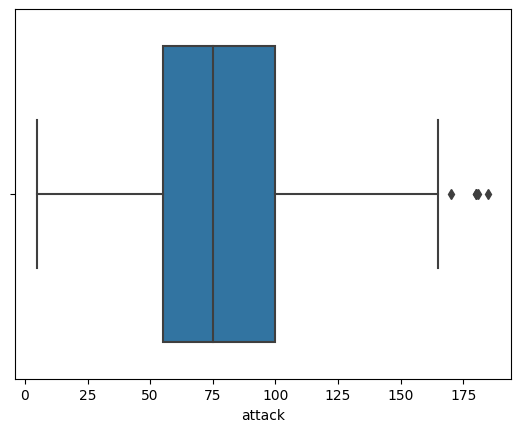

In [45]:
# For numerical columns, you can use boxplots to visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Example for a numerical column, e.g., 'attack'
sns.boxplot(x=pokemon_data['attack'])
plt.show()

# Remove or cap outliers
# Removing outliers beyond 2 standard deviations
mean_attack = pokemon_data['attack'].mean()
std_attack = pokemon_data['attack'].std()
pokemon_data = pokemon_data[(pokemon_data['attack'] < mean_attack + 2 * std_attack) &
                            (pokemon_data['attack'] > mean_attack - 2 * std_attack)]


See how it has changed it (I removed > 2 STD)

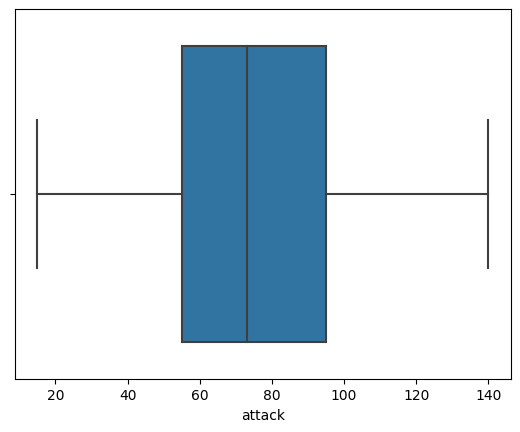

In [46]:
sns.boxplot(x=pokemon_data['attack'])
plt.show()


### (4) Scaling numerical columns

Test with attack and defense to get the code right

In [47]:
# from sklearn.preprocessing import StandardScaler

# # Scaling numerical features - example with 'attack' and 'defense'
# # Scaling numerical features - example with 'attack' and 'defense'
# scaler = StandardScaler()

# # Use .loc to ensure the operation is done on the original DataFrame
# pokemon_data.loc[:, ['attack', 'defense']] = scaler.fit_transform(pokemon_data[['attack', 'defense']])


that worked so let's try on all numerical columns

In [48]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select only numerical columns
numerical_pokemon_data = pokemon_data.select_dtypes(include=[np.number])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the numerical columns
pokemon_data_scaled = scaler.fit_transform(numerical_pokemon_data)

# If you want to replace the original numerical columns in pokemon_data with the scaled versions
pokemon_data[numerical_pokemon_data.columns] = pokemon_data_scaled


/var/folders/hb/q2qy137j1x72dh8sz83fhxgh0000gn/T/ipykernel_47361/4173328912.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_data[numerical_pokemon_data.columns] = pokemon_data_scaled


In [49]:
pokemon_data


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,combined_type_water_fighting,combined_type_water_flying,combined_type_water_ghost,combined_type_water_grass,combined_type_water_ground,combined_type_water_ice,combined_type_water_poison,combined_type_water_psychic,combined_type_water_rock,combined_type_water_steel
0,"['Overgrow', 'Chlorophyll']",-0.000543,-0.129517,0.099710,-0.883293,-1.079356,-0.789294,1.267087,1.332452,0.032218,...,-0.051198,-0.088911,-0.051198,-0.062746,-0.102801,-0.062746,-0.062746,-0.081111,-0.0725,-0.036179
1,"['Overgrow', 'Chlorophyll']",-0.000543,-0.129517,0.099710,-0.883293,-1.079356,-0.789294,1.267087,1.332452,0.032218,...,-0.051198,-0.088911,-0.051198,-0.062746,-0.102801,-0.062746,-0.062746,-0.081111,-0.0725,-0.036179
2,"['Overgrow', 'Chlorophyll']",-0.000543,-0.129517,0.099710,-0.883293,-1.079356,-0.789294,1.267087,1.332452,0.032218,...,-0.051198,-0.088911,-0.051198,-0.062746,-0.102801,-0.062746,-0.062746,-0.081111,-0.0725,-0.036179
3,"['Blaze', 'Solar Power']",-0.831185,-0.129517,0.099710,-0.116302,-1.079356,-0.086781,-0.932584,-0.327688,0.032218,...,-0.051198,-0.088911,-0.051198,-0.062746,-0.102801,-0.062746,-0.062746,-0.081111,-0.0725,-0.036179
4,"['Blaze', 'Solar Power']",-0.831185,-0.129517,0.099710,-0.116302,-1.079356,-0.086781,-0.932584,-0.327688,0.032218,...,-0.051198,-0.088911,-0.051198,-0.062746,-0.102801,-0.062746,-0.062746,-0.081111,-0.0725,-0.036179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,['Beast Boost'],-0.000543,-0.129517,0.099710,-0.883293,-0.119789,-0.086781,-0.199360,-1.157758,0.032218,...,-0.051198,-0.088911,-0.051198,-0.062746,-0.102801,-0.062746,-0.062746,-0.081111,-0.0725,-0.036179
795,['Beast Boost'],-1.246506,-0.129517,-1.339501,1.417681,-1.079356,-0.086781,1.267087,-1.157758,0.032218,...,-0.051198,-0.088911,-0.051198,-0.062746,-0.102801,-0.062746,-0.062746,-0.081111,-0.0725,-0.036179
797,['Beast Boost'],1.660741,-1.302065,2.978133,-0.883293,5.637611,1.318244,-0.932584,-0.327688,-0.880629,...,-0.051198,-0.088911,-0.051198,-0.062746,-0.102801,-0.062746,-0.062746,-0.081111,-0.0725,-0.036179
798,['Prism Armor'],1.660741,2.215580,0.099710,-0.116302,-0.119789,-0.789294,-0.199360,-0.327688,1.857913,...,-0.051198,-0.088911,-0.051198,-0.062746,-0.102801,-0.062746,-0.062746,-0.081111,-0.0725,-0.036179


## 2. Sklearn modelling workflow

Choose a target variable for the model and split features (X) and target (y)

In [50]:
# Example target variable
y = pokemon_data['catchability']  # Adjust according to your target variable
X = pokemon_data.drop('catchability', axis=1)  # Drop the target variable from features


Remove non-numerical columns


In [51]:
X = X.select_dtypes(include=[np.number])


If we want, we can encode the non-numerical columns

In [52]:
# from sklearn.preprocessing import OneHotEncoder

# # Selecting only categorical columns
# categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# # One-Hot Encoding
# encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
# categorical_encoded = encoder.fit_transform(X[categorical_cols])

# # Creating a DataFrame with encoded columns
# encoded_columns = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# # Drop original categorical columns and concat encoded columns
# X = pd.concat([X.drop(categorical_cols, axis=1), encoded_columns], axis=1)


Holdout method and k-fold cross validation

Recheck no missing values


In [53]:
# Identifying the column with the missing value
missing_value_column = X.columns[X.isnull().any()].tolist()
print(f"Column(s) with missing value(s): {missing_value_column}")


Column(s) with missing value(s): []


Fill missing values if any are present

In [54]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")


Length of X: 765
Length of y: 765


In [55]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model (Random Forest Regressor)
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)


# Scoring the model
print("Model Score on Test Data:", model.score(X_test, y_test))

# For K-Fold Cross Validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", scores)


Model Score on Test Data: 0.7069463251983175
Cross-Validation Scores: [0.67688509 0.57803365 0.6265164  0.70875657 0.66098904]


Feature selection

In [56]:
# Example: Feature importance from Random Forest
importances = model.feature_importances_
# Map these importances to feature names and sort them
feature_importances = dict(zip(X.columns, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:", sorted_features)


Feature Importances: [('base_total', 0.5727064197335855), ('base_egg_steps', 0.07123544524718799), ('experience_growth', 0.04064839212235988), ('weight_kg', 0.028451015629218323), ('attack', 0.027284288335797924), ('pokedex_number', 0.0249680252486439), ('sp_attack', 0.022323614487079965), ('is_legendary', 0.02225315526186716), ('hp', 0.01889451993792151), ('height_m', 0.01564565392008729), ('speed', 0.014954580857119657), ('defense', 0.014378757052287614), ('sp_defense', 0.013413993044733627), ('combined_type_fire_None', 0.009785714424177831), ('against_fight', 0.009475129763287174), ('combined_type_normal_None', 0.006216057912616695), ('against_electric', 0.004461366458757224), ('against_normal', 0.004182676064475764), ('against_fire', 0.004177619776421926), ('against_dark', 0.003978244678288562), ('against_ground', 0.003947532491188945), ('against_flying', 0.0037772515543693604), ('against_ice', 0.003715303334240242), ('generation', 0.0036389225631948668), ('combined_type_grass_None

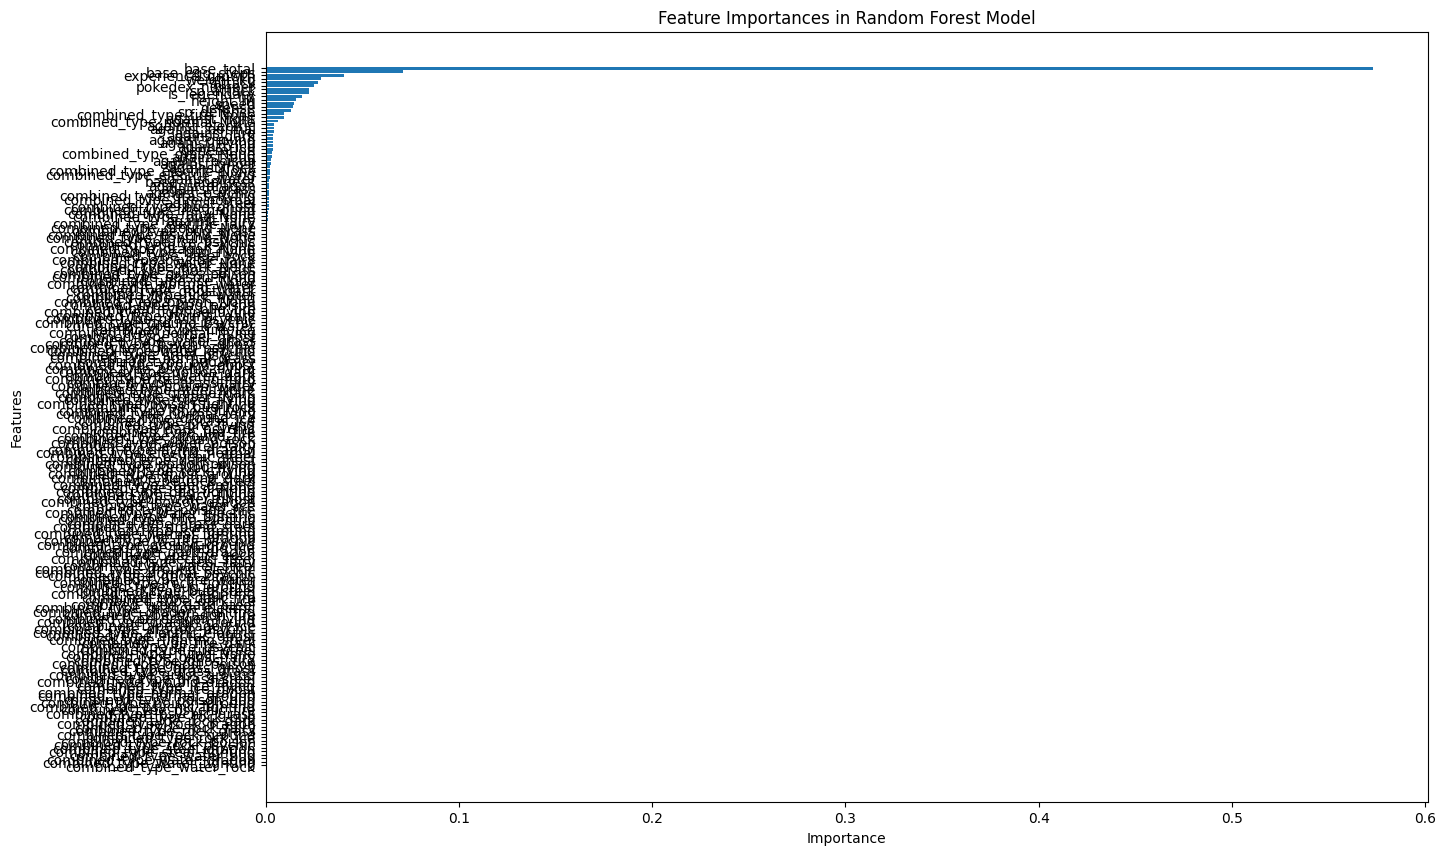

In [57]:
import matplotlib.pyplot as plt

# Assuming sorted_features is your list of features and importances
feature_names = [item[0] for item in sorted_features]
importances = [item[1] for item in sorted_features]

# Creating the bar chart
plt.figure(figsize=(15, 10))  # Adjust the size as needed
plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


### Try with 80/20

In [58]:
# lots of columns... lots of unhelpful features. let's try 80/20
# Calculate the cumulative importance
cumulative_importances = np.cumsum(importances)

# Find the number of features that make up 80% of the total importance
n_important_features = np.where(cumulative_importances > 0.80)[0][0] + 1

# Select the most important features
important_feature_names = feature_names[:n_important_features]

# Create new datasets with only the important features
X_train_important = X_train[important_feature_names]
X_test_important = X_test[important_feature_names]

# Train a new model on the important features
model_important = RandomForestRegressor()
model_important.fit(X_train_important, y_train)

# Evaluate the new model
print("Model Score with Important Features on Test Data:", model_important.score(X_test_important, y_test))


Model Score with Important Features on Test Data: 0.6906969610413096


In [59]:
# Example: Feature importance from Random Forest
importances = model_important.feature_importances_
# Map these importances to feature names and sort them
feature_importances = dict(zip(X.columns, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:", sorted_features)


Feature Importances: [('against_bug', 0.6065876245273867), ('against_dark', 0.08565237841676084), ('against_electric', 0.06383415430210192), ('against_fight', 0.057928536512391667), ('against_dragon', 0.05787609982929402), ('against_fire', 0.05494893894584162), ('against_fairy', 0.05057204397238575), ('against_flying', 0.02260022349383746)]


### Try with 70/30

In [60]:
# lots of columns... lots of unhelpful features. let's try 70/30
# Calculate the cumulative importance
cumulative_importances = np.cumsum(importances)

# Find the number of features that make up 70% of the total importance
n_important_features = np.where(cumulative_importances > 0.70)[0][0] + 1

# Select the most important features
important_feature_names = feature_names[:n_important_features]

# Create new datasets with only the important features
X_train_important = X_train[important_feature_names]
X_test_important = X_test[important_feature_names]

# Train a new model on the important features
model_important2 = RandomForestRegressor()
model_important2.fit(X_train_important, y_train)

# Evaluate the new model
print("Model Score with Important Features on Test Data:", model_important2.score(X_test_important, y_test))


Model Score with Important Features on Test Data: 0.6658339009447884


In [61]:
# Example: Feature importance from Random Forest
importances2 = model_important2.feature_importances_
# Map these importances to feature names and sort them
feature_importances = dict(zip(X.columns, importances2))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:", sorted_features)


Feature Importances: [('against_bug', 0.7620179881991492), ('against_dark', 0.1316867855593404), ('against_dragon', 0.10629522624151039)]


In [62]:
# lots of columns... lots of unhelpful features. let's try 60/40
# Calculate the cumulative importance
cumulative_importances = np.cumsum(importances)

# Find the number of features that make up 70% of the total importance
n_important_features = np.where(cumulative_importances > 0.60)[0][0] + 1

# Select the most important features
important_feature_names = feature_names[:n_important_features]

# Create new datasets with only the important features
X_train_important = X_train[important_feature_names]
X_test_important = X_test[important_feature_names]

# Train a new model on the important features
model_important3 = RandomForestRegressor()
model_important3.fit(X_train_important, y_train)

# Evaluate the new model
print("Model 3 60-40 Score with Important Features on Test Data:", model_important3.score(X_test_important, y_test))


Model 3 60-40 Score with Important Features on Test Data: 0.566560167180928


In [63]:
import numpy as np

# Assuming 'importances' are obtained from model.feature_importances_
# and 'feature_names' is a list of feature names

# Combine the feature names and their importances
feature_importances = zip(feature_names, importances)

# Sort the features by their importance in descending order
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Separate the sorted feature names and their importances
sorted_feature_names, sorted_importances = zip(*sorted_feature_importances)

# Calculate the cumulative importance
cumulative_importances = np.cumsum(sorted_importances)

# Find the number of features that make up 80% of the total importance
n_important_features = np.where(cumulative_importances > 0.80)[0][0] + 1

# Select the most important features
important_feature_names = sorted_feature_names[:n_important_features]

# Create new datasets with only the important features
X_train_important = X_train[list(important_feature_names)]
X_test_important = X_test[list(important_feature_names)]

# Train a new model on the important features
model_important4 = RandomForestRegressor()
model_important4.fit(X_train_important, y_train)

# Evaluate the new model
print("Model Score with Important Features on Test Data:", model_important4.score(X_test_important, y_test))
# For K-Fold Cross Validation
scores = cross_val_score(model_important4, X, y, cv=5)
print("Cross-Validation Scores:", scores)


Model Score with Important Features on Test Data: 0.7008521422737491
Cross-Validation Scores: [0.68420361 0.5670304  0.63445392 0.69834185 0.64983195]


In [64]:
# Example: Feature importance from Random Forest
importances = model_important4.feature_importances_
# Map these importances to feature names and sort them
feature_importances = dict(zip(X.columns, importances))
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
print("Feature Importances:", sorted_features)


Feature Importances: [('against_bug', 0.6616553972592458), ('against_dark', 0.12051433411329589), ('against_dragon', 0.11028621723363158), ('against_electric', 0.10754405139382664)]


## If we start the model work again, but only with limited features (as selected during discussion with Dresseur Master Benjamin)

In [65]:

# Save the entire DataFrame to a CSV file
pokemon_data.to_csv('pokemon_data_scaled.csv', index=False)


In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd  # Import pandas

# Assuming pokemon_data_scaled is your scaled DataFrame and 'y' is your target variable
original_numerical_cols = [
    'sp_attack', 'sp_defense', 'speed', 'weight_kg', 'generation',
    'is_legendary', 'defense', 'experience_growth', 'height_m', 'hp',
    'attack', 'base_egg_steps', 'base_happiness', 'base_total'
]

# Get all columns from the scaled DataFrame that start with 'combined_type_'
combined_type_cols = [col for col in pokemon_data.columns if col.startswith('combined_type_')]

# Combine the original numerical columns with the encoded 'type' columns
final_cols = original_numerical_cols + combined_type_cols

# Convert the numpy array to a DataFrame with the selected columns
pokemon_filtered = pd.DataFrame(pokemon_data, columns=final_cols)

# Splitting the dataset into training and test sets for the new feature matrix
pokemon_filtered_train, pokemon_filtered_test, y_train, y_test = train_test_split(pokemon_filtered, y, test_size=0.3, random_state=42)

# Initialize the model
model_pokemon_filtered = RandomForestRegressor(random_state=42)

# Train the model
model_pokemon_filtered.fit(pokemon_filtered_train, y_train)

# Evaluate the model
score = model_pokemon_filtered.score(pokemon_filtered_test, y_test)
print("Model Score on Test Data with Selected Features:", score)
# For K-Fold Cross Validation
scores = cross_val_score(model_pokemon_filtered, X, y, cv=5)
print("Cross-Validation Scores:", scores)


Model Score on Test Data with Selected Features: 0.6964807403158692
Cross-Validation Scores: [0.69303221 0.58350972 0.61695082 0.71304275 0.66032497]


Compare the models

In [67]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import xgboost as xgb

# Initialize the models
model_random_forest = RandomForestRegressor(random_state=42)
model_gradient_boosting = GradientBoostingRegressor(random_state=42)
model_xgboost = xgb.XGBRegressor(random_state=42)

# Train the models
model_random_forest.fit(pokemon_filtered_train, y_train)
model_gradient_boosting.fit(pokemon_filtered_train, y_train)
model_xgboost.fit(pokemon_filtered_train, y_train)

# Evaluate the models
score_rf = model_random_forest.score(pokemon_filtered_test, y_test)
score_gb = model_gradient_boosting.score(pokemon_filtered_test, y_test)
score_xgb = model_xgboost.score(pokemon_filtered_test, y_test)

print("Random Forest Model Score on Test Data:", score_rf)
print("Gradient Boosting Model Score on Test Data:", score_gb)
print("XGBoost Model Score on Test Data:", score_xgb)
# For K-Fold Cross Validation
scores = cross_val_score(model_random_forest, X, y, cv=5)
print("Cross-Validation RF Scores:", scores)
scores = cross_val_score(model_gradient_boosting, X, y, cv=5)
print("Cross-Validation GB cores:", scores)
scores = cross_val_score(model_xgboost, X, y, cv=5)
print("Cross-Validation XGB Scores:", scores)


Random Forest Model Score on Test Data: 0.6964807403158692
Gradient Boosting Model Score on Test Data: 0.6676370185357474
XGBoost Model Score on Test Data: 0.6355711004356337
Cross-Validation RF Scores: [0.69303221 0.58350972 0.61695082 0.71304275 0.66032497]
Cross-Validation GB cores: [0.64536413 0.58891651 0.60328632 0.68154436 0.61074123]
Cross-Validation XGB Scores: [0.62610245 0.58054465 0.57334544 0.68407458 0.60745875]


try some stacking

In [68]:
import pandas as pd
import ast
# Convert the string representations of lists into actual lists
pokemon_data['abilities'] = pokemon_data['abilities'].apply(lambda x: ast.literal_eval(x))

# Create columns for each ability
all_abilities = set()
for abilities_list in pokemon_data['abilities']:
    all_abilities.update(abilities_list)

# Populate the new columns with binary values
for ability in all_abilities:
    pokemon_data[ability] = pokemon_data['abilities'].apply(lambda x: int(ability in x))

pokemon_data_encoded = pd.get_dummies(pokemon_data, columns=['classfication'])
# Drop the original 'abilities' column
pokemon_data = pokemon_data.drop(columns=['abilities', 'classfication', 'japanese_name', 'name', 'base_total'])
from sklearn.preprocessing import LabelEncoder


/var/folders/hb/q2qy137j1x72dh8sz83fhxgh0000gn/T/ipykernel_47361/1570669828.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_data['abilities'] = pokemon_data['abilities'].apply(lambda x: ast.literal_eval(x))
/var/folders/hb/q2qy137j1x72dh8sz83fhxgh0000gn/T/ipykernel_47361/1570669828.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pokemon_data[ability] = pokemon_data['abilities'].apply(lambda x: int(ability in x))
/var/folders/hb/q2qy137j1x72dh8sz83fhxgh0000gn/T/ipykernel_47361/1570669828.py:13: Setting

In [69]:
pokemon_data


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,Liquid Ooze,Marvel Scale,Color Change,Solid Rock,Water Absorb,Rock Head,Flash Fire,Sturdy,Anticipation,Vital Spirit
0,-0.000543,-0.129517,0.099710,-0.883293,-1.079356,-0.789294,1.267087,1.332452,0.032218,-0.990997,...,0,0,0,0,0,0,0,0,0,0
1,-0.000543,-0.129517,0.099710,-0.883293,-1.079356,-0.789294,1.267087,1.332452,0.032218,-0.990997,...,0,0,0,0,0,0,0,0,0,0
2,-0.000543,-0.129517,0.099710,-0.883293,-1.079356,-0.789294,1.267087,1.332452,0.032218,-0.990997,...,0,0,0,0,0,0,0,0,0,0
3,-0.831185,-0.129517,0.099710,-0.116302,-1.079356,-0.086781,-0.932584,-0.327688,0.032218,-0.674457,...,0,0,0,0,0,0,0,0,0,0
4,-0.831185,-0.129517,0.099710,-0.116302,-1.079356,-0.086781,-0.932584,-0.327688,0.032218,-0.674457,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,-0.000543,-0.129517,0.099710,-0.883293,-0.119789,-0.086781,-0.199360,-1.157758,0.032218,-0.041378,...,0,0,0,0,0,0,0,0,0,0
795,-1.246506,-0.129517,-1.339501,1.417681,-1.079356,-0.086781,1.267087,-1.157758,0.032218,-0.990997,...,0,0,0,0,0,0,0,0,0,0
797,1.660741,-1.302065,2.978133,-0.883293,5.637611,1.318244,-0.932584,-0.327688,-0.880629,-0.674457,...,0,0,0,0,0,0,0,0,0,0
798,1.660741,2.215580,0.099710,-0.116302,-0.119789,-0.789294,-0.199360,-0.327688,1.857913,-0.041378,...,0,0,0,0,0,0,0,0,0,0


In [70]:
y


0     -0.735209
1     -0.735209
2     -0.735209
3     -0.735209
4     -0.735209
         ...   
794   -0.932315
795   -0.998017
797   -1.129421
798   -1.287106
799   -1.287106
Name: catchability, Length: 765, dtype: float64

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

# Assuming pokemon_data is your dataset and 'y' is your target variable
X = pokemon_data  # Features
y = y  # Target variable

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize base models
base_model1 = RandomForestRegressor(random_state=42)
base_model2 = GradientBoostingRegressor(random_state=42)

# Train base models
base_model1.fit(X_train, y_train)
base_model2.fit(X_train, y_train)

# Make predictions using base models
pred1 = base_model1.predict(X_test)
pred2 = base_model2.predict(X_test)

# Create a new feature matrix using base model predictions
X_stacked = np.column_stack((pred1, pred2))

# Initialize the meta-model (often a simple linear regression model)
meta_model = LinearRegression()

# Train the meta-model on the predictions of base models
meta_model.fit(X_stacked, y_test)

# Make predictions using the stacked model
stacked_predictions = meta_model.predict(X_stacked)

# Evaluate the stacked model
stacked_score = r2_score(y_test, stacked_predictions)
print("Stacked Model Score on Test Data:", stacked_score)
# For K-Fold Cross Validation
scores = cross_val_score(meta_model, X, y, cv=5)
print("Cross-Validation Scores:", scores)


Stacked Model Score on Test Data: 0.9999163527369123
Cross-Validation Scores: [ 0.46158027  0.81949234  0.54690777  0.1825811  -1.92159724]


Try RIDGE to see if it helps with the overfitting

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Initialize the Ridge meta-model
ridge_meta_model = Ridge(alpha=1.0)  # You can adjust the alpha hyperparameter

# Train the Ridge meta-model on the predictions of base models
ridge_meta_model.fit(X_stacked, y_test)

# Make predictions using the Ridge stacked model
ridge_stacked_predictions = ridge_meta_model.predict(X_stacked)

# Evaluate the Ridge stacked model
ridge_stacked_score = r2_score(y_test, ridge_stacked_predictions)
print("Ridge Stacked Model Score on Test Data:", ridge_stacked_score)

# For K-Fold Cross Validation with Ridge
ridge_scores = cross_val_score(ridge_meta_model, X, y, cv=5)
print("Ridge Cross-Validation Scores:", ridge_scores)


Ridge Stacked Model Score on Test Data: 0.9999108857503058
Ridge Cross-Validation Scores: [0.99996971 0.99996596 0.99996434 0.99996145 0.99996147]


In [73]:
from sklearn.linear_model import Lasso

# Initialize the Lasso meta-model
lasso_meta_model = Lasso(alpha=1.0)  # You can adjust the alpha hyperparameter

# Train the Lasso meta-model on the predictions of base models
lasso_meta_model.fit(X_stacked, y_test)

# Make predictions using the Lasso stacked model
lasso_stacked_predictions = lasso_meta_model.predict(X_stacked)

# Evaluate the Lasso stacked model
lasso_stacked_score = r2_score(y_test, lasso_stacked_predictions)
print("Lasso Stacked Model Score on Test Data:", lasso_stacked_score)

# For K-Fold Cross Validation with Lasso
lasso_scores = cross_val_score(lasso_meta_model, X, y, cv=5)
print("Lasso Cross-Validation Scores:", lasso_scores)


Lasso Stacked Model Score on Test Data: 0.0
Lasso Cross-Validation Scores: [ 0.00373934 -0.03150804 -0.01165719 -0.00036786 -0.00689595]


# IMPORTS

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import ast

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


# GET DATA

In [75]:
file_path = '/Users/lapiscine/code/CasparRitchie/casparcatchemall/pokemon.csv'

# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path)


# PREPROCESS AND ENCODE

In [76]:
def preprocess_pokemon_data(data):
    # Fill missing values
    data['height_m'].fillna(data['height_m'].median(), inplace=True)
    data['weight_kg'].fillna(data['weight_kg'].median(), inplace=True)

    # Drop columns
    data.drop(columns=['percentage_male'], inplace=True)

    # Convert 'capture_rate' to numeric and create 'catchability'
    data['capture_rate'] = pd.to_numeric(data['capture_rate'], errors='coerce')
    data['catchability'] = data['capture_rate'] / 2.55
    data = data.dropna(subset=['catchability'])
    data = data.drop(columns=['capture_rate'])

    # Handle 'type2' and create 'combined_type'
    data['type2'].fillna('None', inplace=True)
    data['combined_type'] = data['type1'] + "_" + data['type2']

    # One-hot encoding 'combined_type'
    encoder = OneHotEncoder()
    combined_type_encoded = encoder.fit_transform(data[['combined_type']])
    encoded_columns = pd.DataFrame(combined_type_encoded.toarray(), columns=encoder.get_feature_names_out(['combined_type']))
    data = pd.concat([data, encoded_columns], axis=1)

    # Drop the original 'type1', 'type2', and 'combined_type' columns
    data.drop(columns=['type1', 'type2', 'combined_type'], inplace=True)

    # Remove outliers beyond 2 standard deviations in 'attack'
    mean_attack = data['attack'].mean()
    std_attack = data['attack'].std()
    data = data[(data['attack'] < mean_attack + 2 * std_attack) &
                (data['attack'] > mean_attack - 2 * std_attack)]

    # Handle 'abilities'
    data['abilities'] = data['abilities'].apply(ast.literal_eval)
    all_abilities = set().union(*data['abilities'])

    # Prepare data for new DataFrame
    abilities_dicts = []
    for index, row in data.iterrows():
        abilities_dict = {ability: int(ability in row['abilities']) for ability in all_abilities}
        abilities_dicts.append(abilities_dict)

    # Create a DataFrame from list of dictionaries
    abilities_data = pd.DataFrame(abilities_dicts, index=data.index)

    # Concatenate the abilities data
    data = pd.concat([data, abilities_data], axis=1)
    data.drop(columns=['abilities'], inplace=True)


    # One-hot encoding 'classfication' and dropping original columns
    data = pd.get_dummies(data, columns=['classfication'])
    data.drop(columns=['japanese_name', 'name', 'base_total'], inplace=True)

    # Scale numerical columns
    numerical_cols = data.select_dtypes(include=[np.number])
    scaler = StandardScaler()
    data[numerical_cols.columns] = scaler.fit_transform(numerical_cols)

    return data


In [77]:
processed_data = preprocess_pokemon_data(data)
processed_data


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,classfication_Wish Pokémon,classfication_Wolf Pokémon,classfication_Wood Gecko Pokémon,classfication_Woodpecker Pokémon,classfication_Wool Pokémon,classfication_Woolly Crab Pokémon,classfication_Worm Pokémon,classfication_Wrestling Pokémon,classfication_Young Fowl Pokémon,classfication_Zen Charm Pokémon
0,-0.000543,-0.129517,0.099710,-0.883293,-1.079356,-0.789294,1.267087,1.332452,0.032218,-0.990997,...,-0.036179,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.036179,-0.036179
1,-0.000543,-0.129517,0.099710,-0.883293,-1.079356,-0.789294,1.267087,1.332452,0.032218,-0.990997,...,-0.036179,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.036179,-0.036179
2,-0.000543,-0.129517,0.099710,-0.883293,-1.079356,-0.789294,1.267087,1.332452,0.032218,-0.990997,...,-0.036179,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.036179,-0.036179
3,-0.831185,-0.129517,0.099710,-0.116302,-1.079356,-0.086781,-0.932584,-0.327688,0.032218,-0.674457,...,-0.036179,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.036179,-0.036179
4,-0.831185,-0.129517,0.099710,-0.116302,-1.079356,-0.086781,-0.932584,-0.327688,0.032218,-0.674457,...,-0.036179,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.036179,-0.036179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,-0.000543,-0.129517,0.099710,-0.883293,-0.119789,-0.086781,-0.199360,-1.157758,0.032218,-0.041378,...,-0.036179,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.036179,-0.036179
795,-1.246506,-0.129517,-1.339501,1.417681,-1.079356,-0.086781,1.267087,-1.157758,0.032218,-0.990997,...,-0.036179,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.036179,-0.036179
797,1.660741,-1.302065,2.978133,-0.883293,5.637611,1.318244,-0.932584,-0.327688,-0.880629,-0.674457,...,-0.036179,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.036179,-0.036179
798,1.660741,2.215580,0.099710,-0.116302,-0.119789,-0.789294,-0.199360,-0.327688,1.857913,-0.041378,...,-0.036179,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.051198,-0.036179,-0.036179,-0.036179


We could use PCA here ???

In [78]:
# if we wanted to...


So instead let's build our model

In [79]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

data = data.loc[processed_data.index]


# Define the target variable 'y' and features 'X'
y = data['catchability']
X = processed_data.drop('catchability', axis=1)  # Features

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models
base_model1 = RandomForestRegressor(random_state=42)
base_model2 = GradientBoostingRegressor(random_state=42)

# Train base models
base_model1.fit(X_train, y_train)
base_model2.fit(X_train, y_train)

# Make predictions using base models
pred1 = base_model1.predict(X_test)
pred2 = base_model2.predict(X_test)

# Create a new feature matrix using base model predictions
X_stacked = np.column_stack((pred1, pred2))

# Initialize and train the meta-model (Linear Regression)
meta_model = LinearRegression()
meta_model.fit(X_stacked, y_test)

# Make predictions and evaluate the stacked model
stacked_predictions = meta_model.predict(X_stacked)
stacked_score = r2_score(y_test, stacked_predictions)
print("Stacked Model Score on Test Data:", stacked_score)

# K-Fold Cross Validation for Linear Regression Meta-Model
scores = cross_val_score(meta_model, X, y, cv=5)
print("Cross-Validation Scores (Linear Regression):", scores)

# Initialize and train the Ridge meta-model
ridge_meta_model = Ridge(alpha=1.0)
ridge_meta_model.fit(X_stacked, y_test)

# Make predictions and evaluate the Ridge stacked model
ridge_stacked_predictions = ridge_meta_model.predict(X_stacked)
ridge_stacked_score = r2_score(y_test, ridge_stacked_predictions)
print("Ridge Stacked Model Score on Test Data:", ridge_stacked_score)

# K-Fold Cross Validation for Ridge Meta-Model
ridge_scores = cross_val_score(ridge_meta_model, X, y, cv=5)
print("Ridge Cross-Validation Scores:", ridge_scores)


Stacked Model Score on Test Data: 0.7443260640836106
Cross-Validation Scores (Linear Regression): [-4.95840844e+27 -1.60953901e+28 -1.40451602e+28 -7.92317488e+27
 -1.96755769e+28]
Ridge Stacked Model Score on Test Data: 0.7443260640453724
Ridge Cross-Validation Scores: [ 0.20619154  0.20297413  0.27592328  0.00639968 -0.19669084]


In [80]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score

# Initialize AdaBoost Regressor with default hyperparameters
ada_regressor = AdaBoostRegressor()

# Evaluate performance using cross-validation
cv_scores = cross_val_score(ada_regressor, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores (AdaBoost):", cv_scores)

# Train the model on the training data
ada_regressor.fit(X_train, y_train)

# Evaluate the model on the test data
ada_score = ada_regressor.score(X_test, y_test)
print("AdaBoost Model Score on Test Data:", ada_score)


Cross-Validation Scores (AdaBoost): [0.46023844 0.37283272 0.51940339 0.46932518 0.58897112]
AdaBoost Model Score on Test Data: 0.5727755662794658


In [81]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Initialize Gradient Boosting Regressor with default hyperparameters
gb_regressor = GradientBoostingRegressor()

# Evaluate performance using cross-validation
cv_scores = cross_val_score(gb_regressor, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores (Gradient Boosting):", cv_scores)

# Train the model on the training data
gb_regressor.fit(X_train, y_train)

# Evaluate the model on the test data
gb_score = gb_regressor.score(X_test, y_test)
print("Gradient Boosting Model Score on Test Data:", gb_score)


Cross-Validation Scores (Gradient Boosting): [0.64250873 0.52812897 0.5654595  0.64777551 0.71546973]
Gradient Boosting Model Score on Test Data: 0.7256254454936327


In [82]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

# Initialize Bagging Regressor with default hyperparameters
bagging_regressor = BaggingRegressor()

# Evaluate performance using cross-validation
cv_scores = cross_val_score(bagging_regressor, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores (Bagging):", cv_scores)

# Train the model on the training data
bagging_regressor.fit(X_train, y_train)

# Evaluate the model on the test data
bagging_score = bagging_regressor.score(X_test, y_test)
print("Bagging Model Score on Test Data:", bagging_score)


Cross-Validation Scores (Bagging): [0.59090531 0.53173019 0.56987157 0.56688704 0.6743553 ]
Bagging Model Score on Test Data: 0.6969137783183327


In [83]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

# Initialize Extra Trees Regressor with default hyperparameters
extra_trees_regressor = ExtraTreesRegressor()

# Evaluate performance using cross-validation
cv_scores = cross_val_score(extra_trees_regressor, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores (Extra Trees):", cv_scores)

# Train the model on the training data
extra_trees_regressor.fit(X_train, y_train)

# Evaluate the model on the test data
extra_trees_score = extra_trees_regressor.score(X_test, y_test)
print("Extra Trees Model Score on Test Data:", extra_trees_score)


Cross-Validation Scores (Extra Trees): [0.63194351 0.56155603 0.5893127  0.67319417 0.73675997]
Extra Trees Model Score on Test Data: 0.7252393884209547


In [84]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Initialize XGBoost Regressor with default hyperparameters
xgboost_regressor = xgb.XGBRegressor()

# Evaluate performance using cross-validation
cv_scores = cross_val_score(xgboost_regressor, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores (XGBoost):", cv_scores)

# Train the model on the training data
xgboost_regressor.fit(X_train, y_train)

# Evaluate the model on the test data
xgboost_score = xgboost_regressor.score(X_test, y_test)
print("XGBoost Model Score on Test Data:", xgboost_score)


Cross-Validation Scores (XGBoost): [0.54766929 0.54082814 0.59092042 0.69482039 0.72543348]
XGBoost Model Score on Test Data: 0.7072507051403103


In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [150, 160, 250, 500, 600],
    'max_features': [1, 2, 3, 4, 5, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a Random Forest model
rf = RandomForestRegressor(random_state=42)

# Create the Randomized Search CV
random_search = RandomizedSearchCV(
    rf, param_distributions=param_grid, n_iter=100,
    scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42
)

# Fit the Randomized Search to your data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Best Model Score on Test Data:", r2)


Best Hyperparameters: {'n_estimators': 160, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Model Score on Test Data: 0.6655747958411522


In [86]:
# from sklearn.base import BaseEstimator, TransformerMixin
# import pandas as pd
# import numpy as np
# import ast

# class PokemonDataTransformer(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self

#     def transform(self, X, y=None):
#         # Fill missing values
#         X['height_m'].fillna(X['height_m'].median(), inplace=True)
#         X['weight_kg'].fillna(X['weight_kg'].median(), inplace=True)

#         # New feature 'catchability' (Ensure 'capture_rate' exists)
#         X['capture_rate'] = pd.to_numeric(X['capture_rate'], errors='coerce')
#         X['catchability'] = X['capture_rate'] / 2.55
#         X.dropna(subset=['catchability'], inplace=True)

#         # Drop columns (After using 'capture_rate')
#         X.drop(columns=['percentage_male', 'capture_rate'], inplace=True)

#         # Combine types
#         X['type2'].fillna('None', inplace=True)
#         X['combined_type'] = X['type1'] + "_" + X['type2']
#         X.drop(columns=['type1', 'type2'], inplace=True)

#         # Remove outliers
#         mean_attack = X['attack'].mean()
#         std_attack = X['attack'].std()
#         X = X[(X['attack'] < mean_attack + 2 * std_attack) &
#               (X['attack'] > mean_attack - 2 * std_attack)]

#         # Abilities
#         X['abilities'] = X['abilities'].apply(ast.literal_eval)
#         all_abilities = set().union(*X['abilities'])
#         for ability in all_abilities:
#             X[ability] = X['abilities'].apply(lambda x: int(ability in x))
#         X.drop(columns=['abilities'], inplace=True)

#         return X

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler, OneHotEncoder

# def create_pipeline():
#     # Custom transformer
#     custom_transformer = PokemonDataTransformer()

#     # Column transformer for one-hot encoding
#     column_transformer = ColumnTransformer([
#         ("encoder", OneHotEncoder(sparse=False), ['combined_type', 'classfication'])
#     ], remainder='passthrough')

#     # Full pipeline
#     pipeline = Pipeline([
#         ('custom', custom_transformer),
#         ('column_transform', column_transformer),
#         ('scaler', StandardScaler())
#     ])

#     return pipeline
# # Load your data
# pokemon_data = pd.read_csv('/Users/lapiscine/code/CasparRitchie/casparcatchemall/pokemon.csv')

# # Create and apply the pipeline
# pipeline = create_pipeline()
# pokemon_data_processed = pipeline.fit_transform(pokemon_data)

# # Now pokemon_data_processed is ready for modeling


In [88]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1, 2, 3, 4, 5, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Best Model Score on Test Data:", r2)


Fitting 5 folds for each of 1134 candidates, totalling 5670 fits
[CV] END bootstrap=True, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total tim